# Step 2

## Plot trade-offs

In [1]:
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\irene\anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
C:\Users\irene\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


In [5]:
results2=pd.read_excel('./Data/results_step2_4.xlsx')
results2

,Unnamed: 0,Proposed harvesting quota,Food provision by MF,Total vertical migration,Atmosphere,Biomass MF
0,0,15.196049,0.583285,12.061482,1013.026733,10.149460
1,1,10.375322,0.545685,12.310978,1011.903137,10.359330
2,2,11.414289,0.559458,12.309774,1011.914734,10.358315
3,3,14.284530,0.580786,12.148522,1012.546326,10.222675
4,4,17.707145,0.585930,11.817899,1014.530701,9.944562
5,5,16.100820,0.584791,11.971455,1013.561829,10.073729
6,6,13.035668,0.574572,12.246263,1012.093994,10.304892
7,7,15.351926,0.583615,12.046156,1013.114990,10.136566


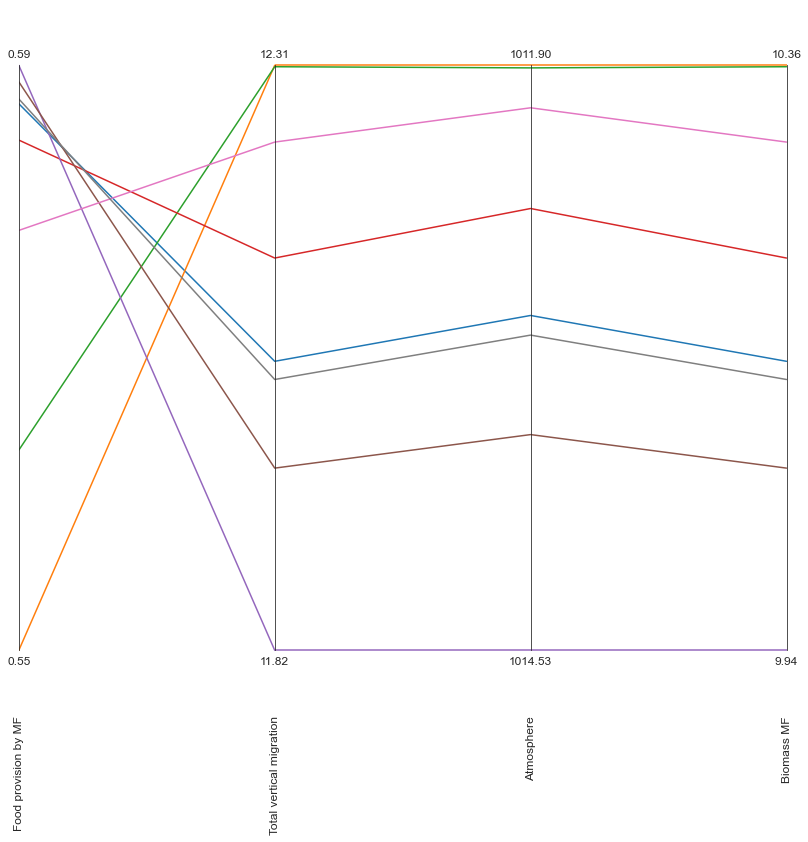

In [7]:

from ema_workbench.analysis import parcoords
data = results2.loc[:, ['Average food provision by MF', 'Average vertical migration', 'Biomass MF 10th percentile', 'Final atmospheric C level']]

limits = parcoords.get_limits(data)
paraxes = parcoords.ParallelAxes(limits, fontsize=12)
paraxes.plot(data)
paraxes.invert_axis('Final atmospheric C level')
fig=plt.gcf()
fig.set_size_inches(12,20)
plt.savefig('./Figures/tradeoffs_st2.png')
plt.show()

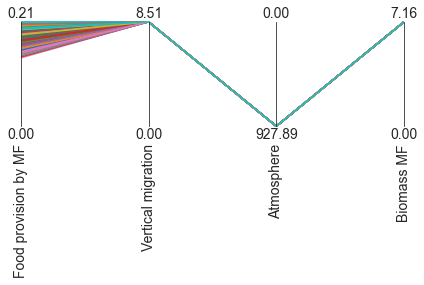

In [7]:
#dit normaliseren, misschien in assi8?

data = results2.loc[:, ['Average food provision by MF', 'Average vertical migration', 'Biomass MF 10th percentile', 'Final atmospheric C level']]
limits = parcoords.get_limits(data)
limits.loc[0, ['Average food provision by MF', 'Average vertical migration', 'Biomass MF 10th percentile', 'Final atmospheric C level']] = 0

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
paraxes.invert_axis('Final atmospheric C level')
plt.savefig('./Figures/tradeoffs_st2.png')
plt.show()

## Convergence check

In [17]:
results_con=pd.read_excel('./Data/results_convergence.xlsx')
conv_con=pd.read_excel('./Data/conv_convergence.xlsx')
results_con
#conv_con 

,Unnamed: 0,Percentage discarded fish,Time between meeting,Food provision by MF,Vertical migration,Atmosphere,Biomass MF
0,0,0.360969,2.052510,0.169612,8.505705,927.861816,7.154806
1,1,0.339785,2.381720,0.168291,8.505728,927.860962,7.154825
2,2,0.418974,2.058935,0.175696,8.505484,927.865784,7.154619
3,3,0.495128,2.000838,0.183437,8.505204,927.870911,7.154385
4,4,0.232788,2.002197,0.156032,8.506201,927.852966,7.155223
5,5,0.184876,2.127248,0.151356,8.506358,927.849915,7.155355
6,6,0.683727,2.007024,0.203062,8.504477,927.883850,7.153773
7,7,0.650797,2.129827,0.200103,8.504573,927.881958,7.153853
8,8,0.700000,4.890821,0.209562,8.504094,927.888489,7.153451
9,9,0.095603,2.272101,0.142285,8.506674,927.843994,7.155622


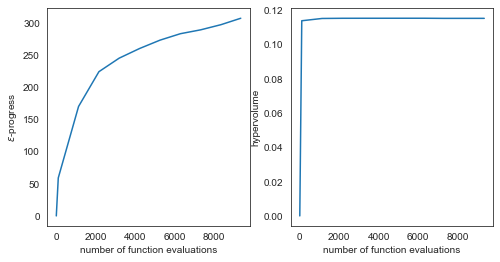

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(conv_con.nfe, conv_con.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(conv_con.nfe, conv_con.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.savefig('./Figures/convergence_st23.png')
plt.show()

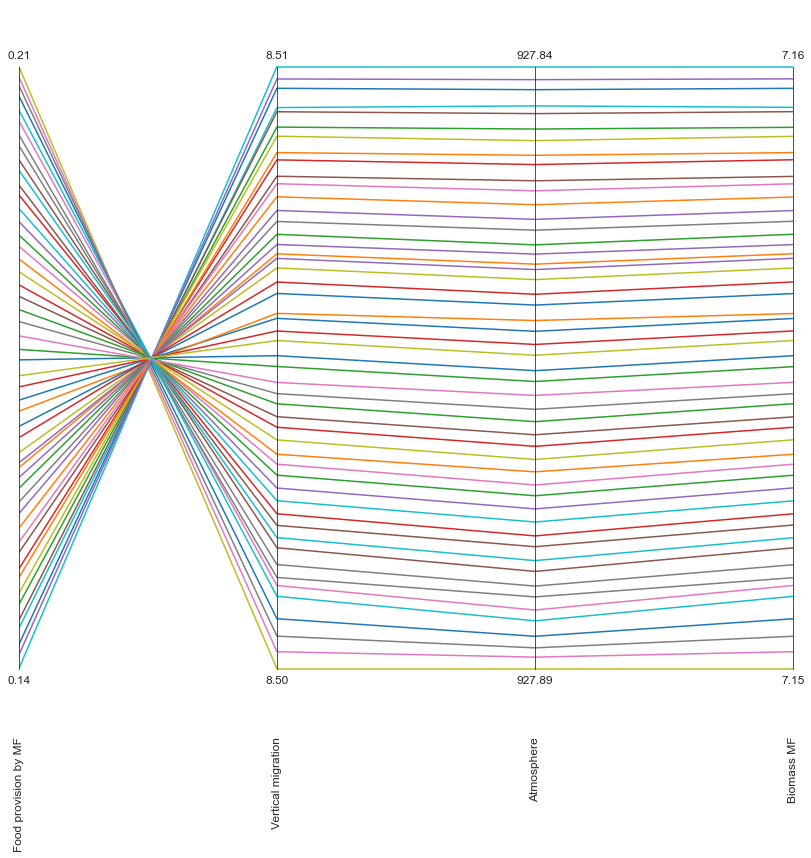

In [16]:
from ema_workbench.analysis import parcoords
data = results_con.loc[:, ['Average food provision by MF', 'Average vertical migration', 'Biomass MF 10th percentile', 'Final atmospheric C level']]

limits = parcoords.get_limits(data)
paraxes = parcoords.ParallelAxes(limits, fontsize=12)
paraxes.plot(data)
paraxes.invert_axis('Final atmospheric C level')
fig=plt.gcf()
fig.set_size_inches(12,20)
plt.savefig('./Figures/tradeoffs_st23_conv.png')
plt.show()